In [9]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor#将数据转换为张量的库
import matplotlib.pyplot as plt #用于绘图的库

#训练数据
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
#测试数据
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

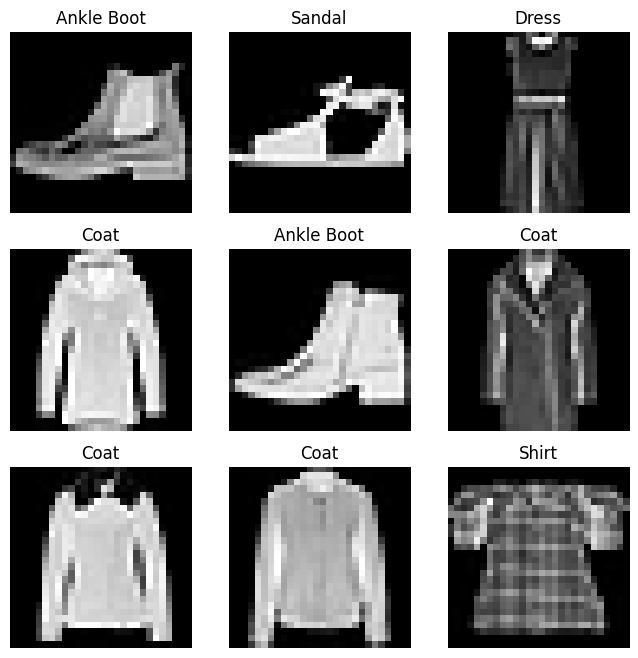

In [10]:
labels_map = {#将数据集的标签映射到服装名称
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))#创建图形窗口
cols, rows = 3, 3#三行，三列分布
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()#随机选择一个样本
    img, label = training_data[sample_idx]#根据索引获取样本
    figure.add_subplot(rows, cols, i)#添加子图
    plt.title(labels_map[label])#设置标题
    plt.axis("off")#不显示坐标轴
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [17]:
# 创建自定义数据集
import os #用于处理文件路径的库
import pandas as pd#用于处理数据的库
from torchvision.io import read_image#用于读取图像

#继承Dataset类，给数据集定义接口
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [18]:
#实例化数据集对象，初始化包含图像路径和标签的CSV文件
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform 

In [13]:
#返回数据集的样本数量
def __len__(self):
    return len(self.img_labels)

In [19]:
# 这个函数根据idx索引从数据集中加载并返回一个样本，并可以将其转化为张量图像
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label 

In [21]:
#使用DataLoader准备训练数据
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


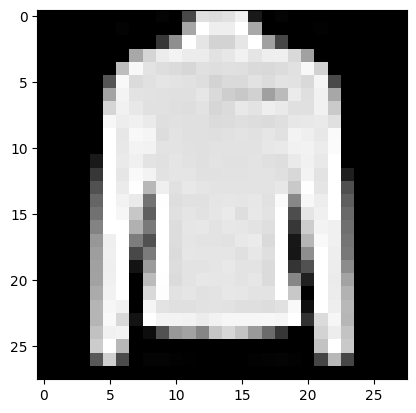

Label: 4


In [16]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
#遍历完所有批次之后，数据将重新洗牌